# Problem Set 4

## Yanwei Pan
panyw@uchicago.edu

### 2.1

In [30]:
import scipy.optimize as opt
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = sum(bvec_guess)
    K_cnstr = (K <= 0)
    L = sum(nvec)
    w = (1 - alpha) * A * (K / L) ** alpha
    r = alpha * A * (L / K) ** (1 - alpha) - delta
    c1 = nvec[0] * w - b2
    c2 = nvec[1] * w + (1 + r) * b2 - b3
    c3 = nvec[2] * w + (1 + r) * b3
    c_cnstr = [(c1 <= 0), (c2 <= 0), (c3 <= 0)]
    b_cnstr = [c_cnstr[0] or c_cnstr[1], c_cnstr[1] or c_cnstr[2]]
        
    return b_cnstr, c_cnstr, K_cnstr

In [56]:
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35

In [5]:
###a###
nvec = np.array([1, 1, 0.2])
f_params = nvec, A, alpha, delta
feasible(f_params, np.array([1.0, 1.2]))

([True, False], [True, False, False], False)

As the result shows, the constrain of first period consumption is violated.

In [6]:
###b###
feasible(f_params, np.array([0.06, -0.001]))

([False, False], [False, False, False], False)

No constraints are violated.

In [7]:
###c###
feasible(f_params, np.array([0.1, 0.1]))

([False, False], [False, False, False], False)

No constraints are violated.

### 2.2

In [15]:
def Equation(bvec, *args):
    b2, b3 = bvec
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = args
    K_ss = b2 + b3
    w_ss = (1 - alpha) * A * (K_ss / L) ** alpha
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    C_ss = [w_ss-b2, w_ss + (1 + r_ss) * b2 - b3, 0.2 * w_ss + (1 + r_ss) * b3]
    error1 = (C_ss[0] ** -sigma) - beta * (1 + r_ss) * (C_ss[1] ** -sigma)
    error2 = (C_ss[1] ** -sigma) - beta * (1 + r_ss) * (C_ss[2] ** -sigma)
    Euler_eqs = np.array([error1, error2])
    return Euler_eqs

def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    b_ss = np.array(root(Equation, bvec_guess, args=params).x)
    K_ss = sum(b_ss)
    w_ss = (1 -alpha) * A * (K_ss / L) ** alpha
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    Y_ss=A * (K_ss ** alpha) * (L ** (1 - alpha))
    c1 = w_ss - b_ss[0]
    c2 = w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c3 = 0.2 * w_ss + (1 + r_ss) * b_ss[1]
    c_ss = np.array([c1, c2, c3])
    C_ss = c1 + c2 + c3
    error1 = (c_ss[0] ** -sigma) - beta * (1 + r_ss) * (c_ss[1] ** -sigma)
    error2 = (c_ss[1] ** -sigma) - beta * (1 + r_ss) * (c_ss[2] ** -sigma)
    EulErr_ss = np.array([error1, error2])
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
                 'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 'EulErr_ss': EulErr_ss,
                 'RCerr_ss': RCerr_ss, 'ss_time': ss_time}
    if SS_graphs:
        t1 = np.array([1,2,3])
        t2 = np.array([2,3])
        plt.plot(t1, c_ss,label='Consumption')
        plt.plot(t2, b_ss,label='Savings')
        plt.xlabel('Age')
        plt.ylabel('Comsumption & Savings')
        plt.title('Steady-state Distribution')
        plt.legend()
    return ss_output

In [16]:
###a###
L = nvec.sum()
SS_tol = 1e-9
params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
result1 = get_SS(params, np.array([0.1, 0.1]), False)
print("Values: ", result1)

Values:  {'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': array([0.18241213, 0.20961468, 0.24087387]), 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': 0.6827603788602411, 'C_ss': 0.6329006729395864, 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]), 'RCerr_ss': 8.326672684688674e-17, 'ss_time': 0.0006109999999996951}


/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


It takes 0.0006109999999996951s to compute the steady-state

/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0010639999999999539}

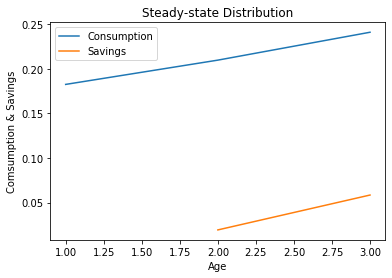

In [18]:
###b###
get_SS(params, np.array([0.1, 0.1]), True)

Values:  {'b_ss': array([0.02817692, 0.07686545]), 'c_ss': array([0.19597528, 0.22861594, 0.26669307]), 'w_ss': 0.22415219593446706, 'r_ss': 1.8863765057189819, 'K_ss': 0.1050423702259807, 'Y_ss': 0.7586689708551193, 'C_ss': 0.6912842903551526, 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]), 'RCerr_ss': 9.71445146547012e-17, 'ss_time': 0.0005000000000006111}


/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


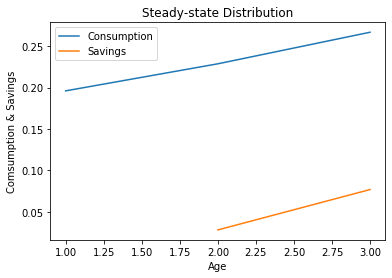

In [55]:
###c###
params = (0.55, sigma, nvec, L, A, alpha, delta, SS_tol)
result2 = get_SS(params, np.array([0.1, 0.1]), True)
print("Values: ", result2)

As beta increases, the consumption, savings and wage increase, but interest rates decrease. This is because when the people become more patient, they would save more at the same interest rate. When the savings increases, the aggregate capital increase too. It increases the the marginal productivity of labor so the wage increases. So as the beta increases, people have a higher consumptions and higher savings.

### 2.3

In [62]:
def get_r(K, L, alpha, delta, A):
    return A * alpha * ((L / K) ** (1 - alpha)) - delta

def get_w(K, L, alpha, A):
    return A * (1 - alpha) * ((K / L) ** alpha)

def get_cons(b_s, b_s_1, n_s, r, w):
    return w * n_s + (1 + r) * b_s - b_s_1

def get_MU(c, sigma):
    return c ** (-sigma)

def get_Y(K, L, alpha, A):
    return A * (K ** alpha) * (L ** (1-alpha))

def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path


def Equation_2(bvec, *args):
    b2, b3 = bvec
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    K_ss = b2 + b3
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1, sigma)
    MU2 = get_MU(c2, sigma)
    MU3 = get_MU(c3, sigma)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_eqs = np.array([Eul1, Eul2])
    return Euler_eqs

def new_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2, sigma)
        MU3 = get_MU(c3, sigma)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(Equation_2, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = new_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = new_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "       difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

In [54]:
result1['b_ss']

array([0.01931253, 0.0584111 ])

In [63]:
###a###
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * result1['b_ss'][0], 1.1 * result1['b_ss'][1]])
T = 25
m = 25
bvec_ss = result1['b_ss']
K_ss = result1['K_ss']
K_init = bvec_init.sum()
path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

In [64]:
path = TPI(path_init, xival, tol, 
           bvec_init, T, m, beta, 
           alpha, delta, sigma, 
           A, nvec, bvec_ss, K_ss)

iteration:  1        difference:  0.0026923268543442304
iteration:  2        difference:  0.002157561740107384
iteration:  3        difference:  0.0017408174700849325
iteration:  4        difference:  0.0014142121894262733
iteration:  5        difference:  0.0011567365684827385
iteration:  6        difference:  0.0009525098783005804
iteration:  7        difference:  0.0007894893845593562
iteration:  8        difference:  0.0006585123205853974
iteration:  9        difference:  0.0005525827671266743
iteration:  10        difference:  0.0004663394689037951
iteration:  11        difference:  0.00039565771612220233
iteration:  12        difference:  0.0003373508229514696
iteration:  13        difference:  0.00028894577394323863
iteration:  14        difference:  0.00024851422573664284
iteration:  15        difference:  0.00021454491036903037
iteration:  16        difference:  0.00018584706684335225
iteration:  17        difference:  0.00016147717292832388
iteration:  18        difference:  

In [65]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]
Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = Equation_2(b_path[i, :], w_path[i,1], w_path[i+1,1], w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], \
                               beta, alpha, delta, sigma, A, nvec)
    
print('Maximum of the absolute values of all the Euler errors across the entire time path:', 
      np.abs(Eulerr_path).max())
print('Maximum of the absolute values of all the resource constraint errors across the entire time path:', 
      np.abs(RCerr_path).max())

Maximum of the absolute values of all the Euler errors across the entire time path: 37.40392775466482
Maximum of the absolute values of all the resource constraint errors across the entire time path: 0.0057734276923919435


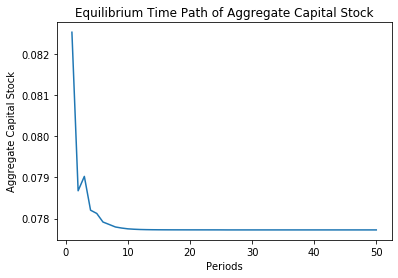

In [67]:
###b###
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Aggregate Capital Stock')
plt.title('Equilibrium Time Path of Aggregate Capital Stock')
plt.show()

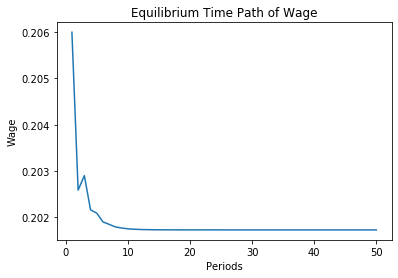

In [68]:
w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Wage')
plt.title('Equilibrium Time Path of Wage')
plt.show()

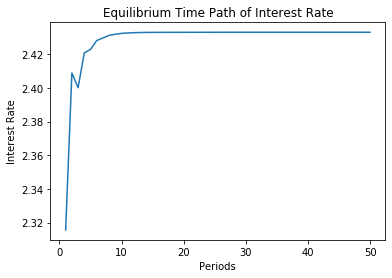

In [69]:
r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Interest Rate')
plt.title('Equilibrium Time Path of Interest Rate')
plt.show()

In [70]:
###c###
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('It takes {} periods to get within 0.00001 of the steady-state aggregate capital stock'.format(int(K_path[i, 0])))
        break

It takes 13 periods to get within 0.00001 of the steady-state aggregate capital stock


In [71]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("The period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state is period {}".format(int(K_path[i, 0])))
        break

The period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state is period 13
